# Download input data at the link below and save it to ./data/


https://drive.google.com/file/d/1acUbYZ97UVjqRUH9TXmyTFtJJvblhdOn/view?usp=sharing

# Download Feature Selector script here

https://github.com/jhabib/w210/blob/master/feature_selector.py

# Process Categorical data for use in models

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load Categorical data (Amenities)

In [2]:
cat_data = pd.read_csv('./data/amenities_features.csv', low_memory=False)
cat_data = cat_data.drop('Unnamed: 0', axis=1)
cat_data['id'] = cat_data['id'].astype(int)
cat_data = cat_data.astype(bool)
print cat_data.shape

(243721, 196)


# Load Reviews Data (Dependent variable)

In [3]:
reviews_data = pd.read_csv('./data/reviews_features.csv', low_memory=False, dtype=float)
reviews_data = reviews_data.drop('Unnamed: 0', axis=1)
reviews_data['id'] = reviews_data['id'].astype(int).astype("category")
print reviews_data.shape

(243721, 5)


# Get Random Sample for use in EDA

In [4]:
# select random rows
import numpy as np

np.random.seed(1234)
sample_size=5000
idxs = np.random.randint(0, cat_data.shape[0], sample_size)
idxs

array([224047, 189139, 165158, ..., 198969, 190231,   2508])

# Select Dependent Variable

In [5]:
dependent_variable = 'review_scores_rating'

data = pd.concat([cat_data.loc[idxs], reviews_data.loc[idxs][[dependent_variable]]], axis=1)
print data.shape
print data.columns[:5]

data = data.drop(['id'], axis=1)
data = data.dropna(subset=[dependent_variable])

print data.shape

(5000, 197)
Index([u'id', u'amenities', u'amenities_', u'amenities_accessibleheightbed',
       u'amenities_accessibleheighttoilet'],
      dtype='object')
(3860, 196)


# Histogram of each dependent variable
Quite useless for Categorical data

amenities


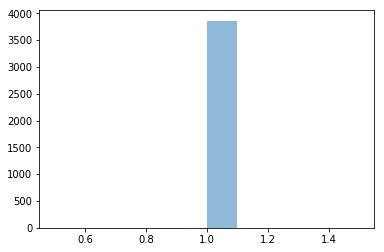

amenities_


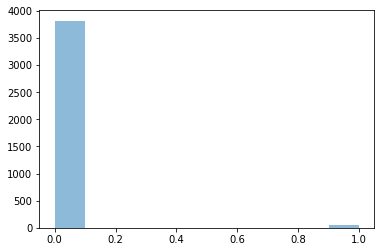

amenities_accessibleheightbed


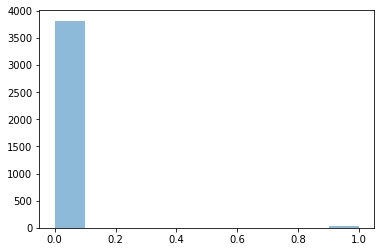

amenities_accessibleheighttoilet


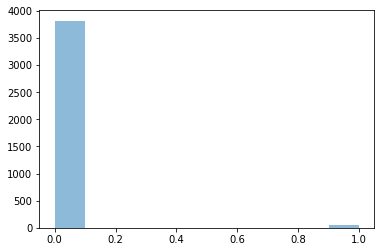

amenities_airconditioning


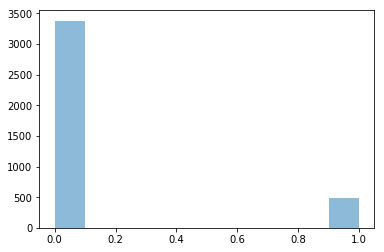

amenities_amazonecho


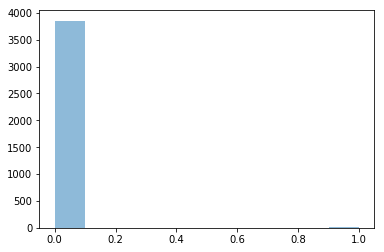

amenities_babybath


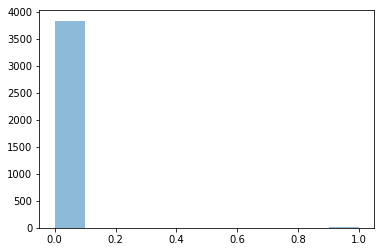

amenities_babymonitor


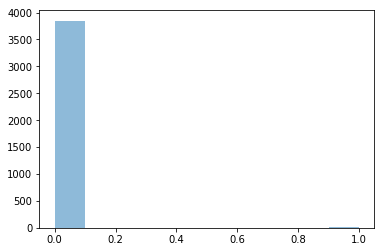

amenities_babysitterrecommendations


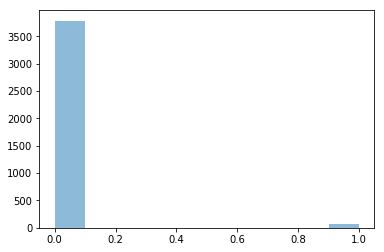

amenities_balcony


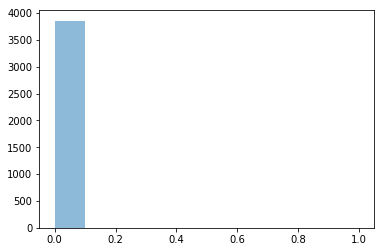

In [6]:
import matplotlib.pyplot as plt
for c in data.columns[:10]:
    if 'id' != c:
        print c
        lst = list(data[c].fillna('0'))
        plt.hist(lst, bins=10, alpha=0.5)
        plt.show()

# Create boxplot of dependent variable for each amenity

In [7]:
import seaborn as sns


# bed, room, neighbourhood, property, cancellation, host_response
sns.set_style('whitegrid')

amenities = []

for c in data.columns:
    if 'amenities_' in c:
        amenities.append(c)
        

def create_boxplot(df, columns, dep_cutoff=0.):
    n = len(columns)
    fig, axes = plt.subplots(nrows=17, ncols=n//16, 
                             sharex=True, 
                             sharey=True, 
                             squeeze=True, 
                             figsize=(40, 120))
    axes = axes.flatten()
    for ax, c in zip(axes, columns):
        subset = data.loc[data[c] == True]
        subset = subset[[c, dependent_variable]]
        subset = subset.loc[subset[dependent_variable] >= dep_cutoff]
        if not subset[c].empty:
            sns.boxplot(x=subset[c], 
                        y=subset[dependent_variable], 
                        ax=ax, 
                       boxprops=dict(alpha=0.5))

Boxplot of review_scores_rating vs. bed_type


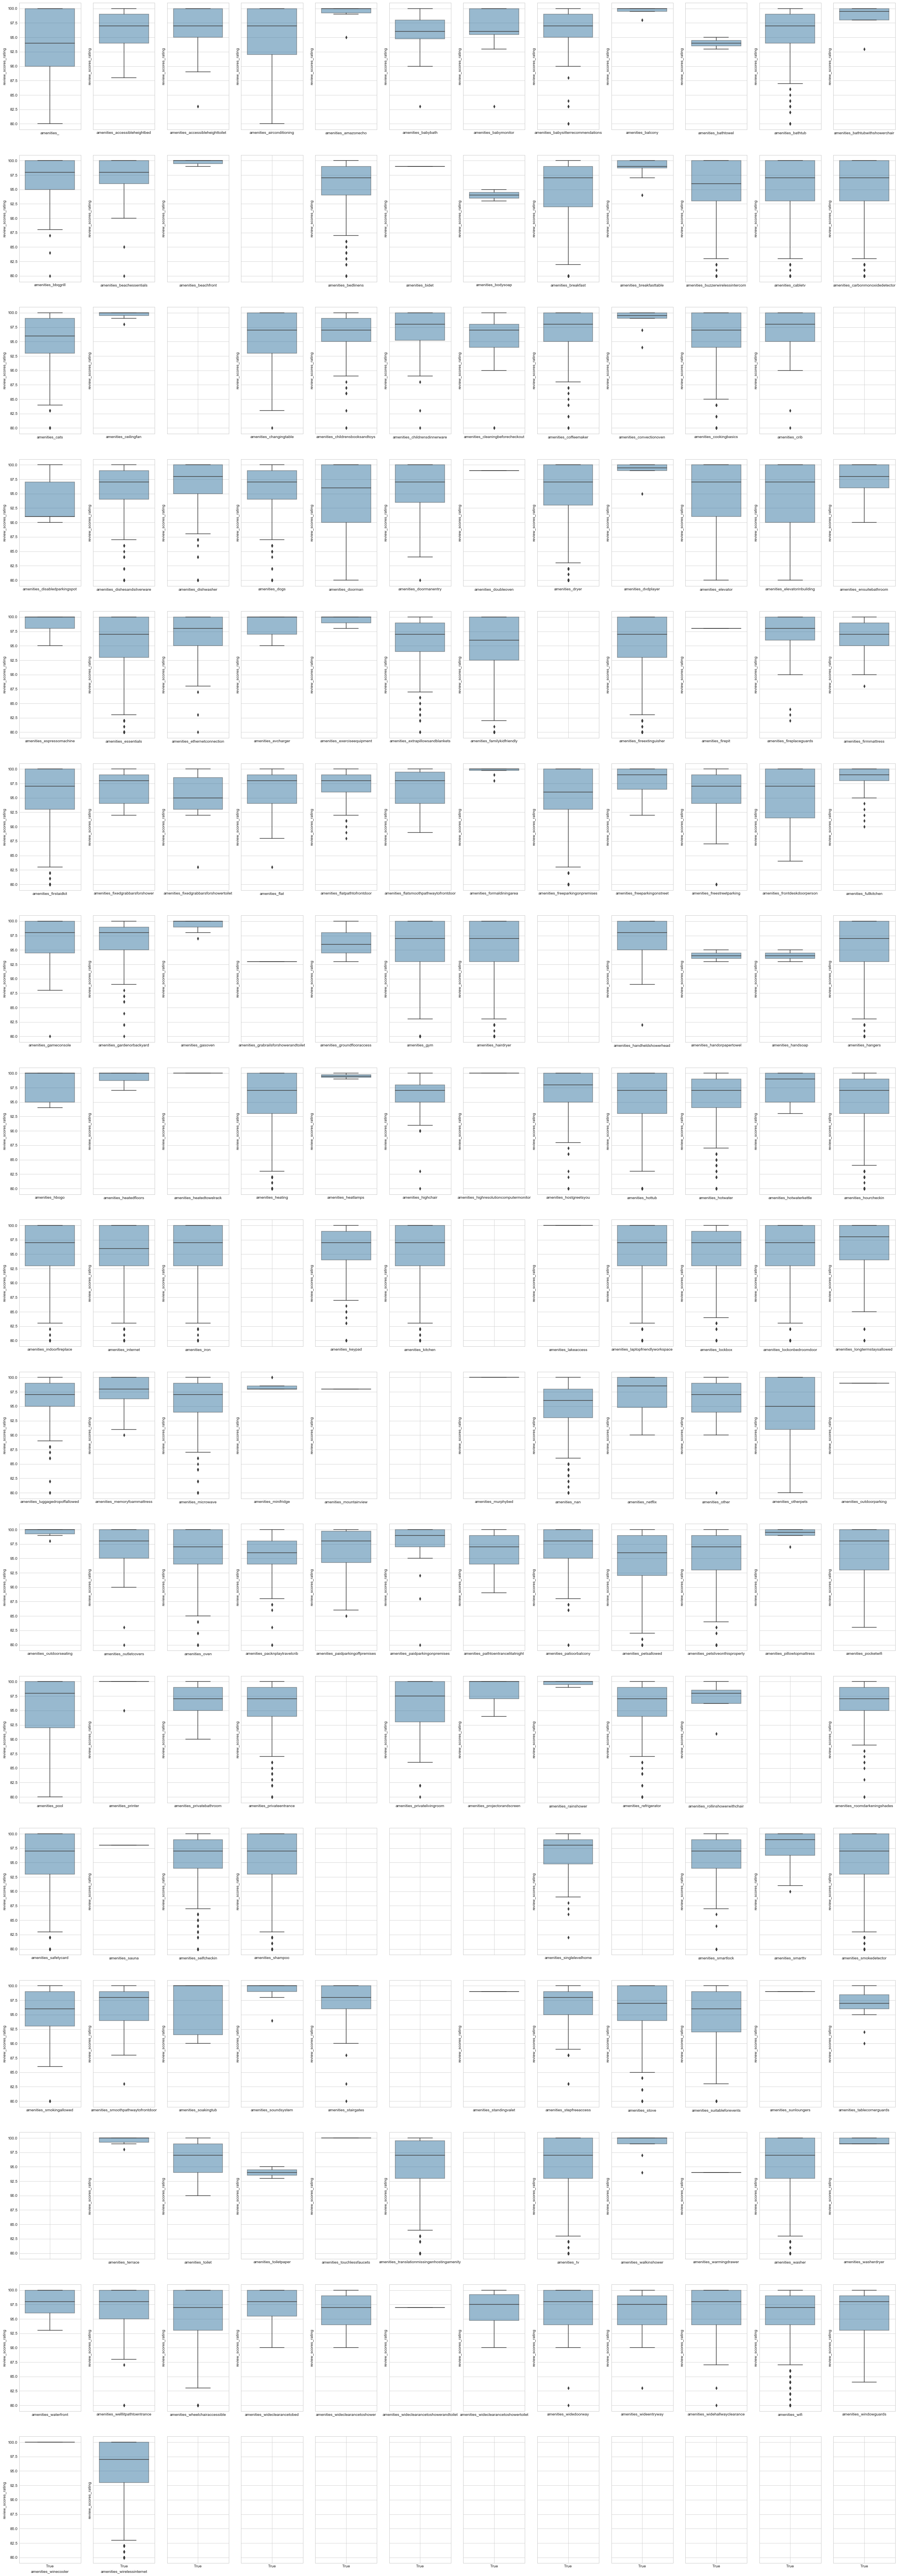

In [8]:
print 'Boxplot of %s vs. %s' % ('review_scores_rating', 'bed_type')
create_boxplot(data, amenities, 80)

The boxplots show different quantiles for review_scores_rating for each item in the categorical variable

In [9]:
print data.shape

(3860, 196)


# Separate Dependent and Independent variables

In [10]:
# Create the X and y
# Drop the columns that we do not need
y = data[dependent_variable]
X = data.drop([dependent_variable], axis=1)

print X.shape
print y.shape

(3860, 195)
(3860,)


# Remove useless features

In [11]:
# Let's get rid of useless categorical features

from feature_selector import FeatureSelector

fs = FeatureSelector(data=X, 
                     labels=y)
fs.identify_single_unique()
fs.identify_zero_importance(task='regression', eval_metric='rmse')
fs.identify_low_importance(cumulative_importance=0.90)

X = fs.remove(methods=['single_unique', 'low_importance', 'zero_importance'])

18 features with a single unique value.

Training Gradient Boosting Model

Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[257]	valid_0's rmse: 6.88659
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[354]	valid_0's rmse: 6.90036
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[358]	valid_0's rmse: 6.25647
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[224]	valid_0's rmse: 7.6366
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[152]	valid_0's rmse: 6.46112
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[58]	valid_0's rmse: 5.50583
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[111]	valid_0's rmse: 6.27661
Training until validation score

# Plot Feature importance using regression

Feature ranking: 
1. amenities_airconditioning 23 (0.052660)
2. amenities_breakfast 28 (0.050068)
3. amenities_buzzerwirelessintercom 37 (0.042952)
4. amenities_cabletv 12 (0.041191)
5. amenities_carbonmonoxidedetector 35 (0.036474)
6. amenities_dogs 4 (0.034745)
7. amenities_doorman 29 (0.034132)
8. amenities_dryer 38 (0.032777)
9. amenities_elevator 39 (0.030803)
10. amenities_elevatorinbuilding 26 (0.030347)
11. amenities_essentials 21 (0.030223)
12. amenities_familykidfriendly 25 (0.029274)
13. amenities_fireextinguisher 11 (0.029178)
14. amenities_firstaidkit 0 (0.028592)
15. amenities_freeparkingonpremises 14 (0.028488)
16. amenities_gym 7 (0.026124)
17. amenities_hairdryer 13 (0.025981)
18. amenities_hangers 22 (0.024923)
19. amenities_heating 10 (0.024679)
20. amenities_hottub 17 (0.022483)
21. amenities_hotwater 16 (0.021018)
22. amenities_hourcheckin 41 (0.020854)
23. amenities_indoorfireplace 18 (0.019878)
24. amenities_internet 30 (0.019709)
25. amenities_iron 2 (0.019373)


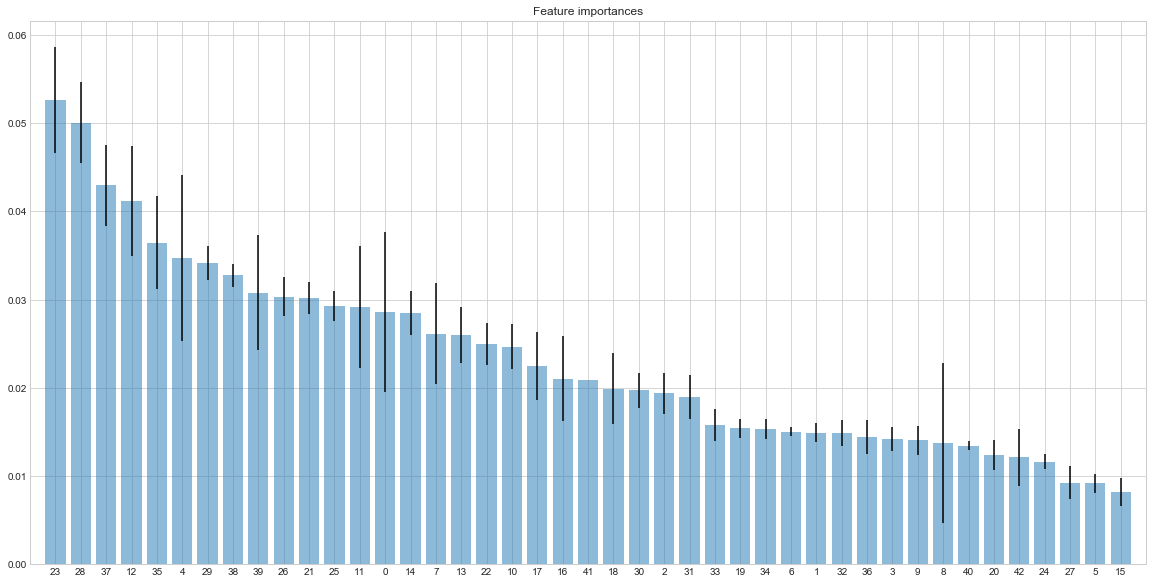

In [12]:
from sklearn.ensemble import ExtraTreesRegressor

forest = ExtraTreesRegressor(n_estimators=250, random_state=1234)

forest.fit(X, y)

importances = forest.feature_importances_

std = np.std([tree.feature_importances_ for tree in forest.estimators_], 
             axis=0)

indices = np.argsort(importances)[::-1]

print 'Feature ranking: '


for f, c in zip(range(X.shape[1]), X.columns):
    print '%d. %s %d (%f)' % (f+1, c, indices[f], 
                              importances[indices[f]])


# Plot the feature importances of the forest
plt.figure(figsize=
           (20, 10))
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices], yerr=std[indices], align="center", alpha=0.5)
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

# Processing the final data
In order to create the processed dataset, here's what we will do:
1. Load all the categorical data
2. Split the data into Training and Test sets using random indexes
3. Process the data 
4. Save the Processed into csv files

In [13]:
cat_data = pd.read_csv('./data/amenities_features.csv', low_memory=False)
cat_data = cat_data.drop('Unnamed: 0', axis=1)
cat_data['id'] = cat_data['id'].astype(int)
cat_data = cat_data.astype(bool)
print cat_data.shape

reviews_data = pd.read_csv('./data/reviews_features.csv', low_memory=False, dtype=float)
reviews_data = reviews_data.drop('Unnamed: 0', axis=1)
reviews_data['id'] = reviews_data['id'].astype(int).astype("category")
print reviews_data.shape

(243721, 196)
(243721, 5)


In [14]:
dependent_variable = 'review_scores_rating'

data = pd.concat([cat_data, reviews_data[[dependent_variable]]], axis=1)

data = data.drop(['id'], axis=1)
data = data.dropna(subset=[dependent_variable])

print data.shape
print data.sample(1)

(190004, 196)
       amenities  amenities_  amenities_accessibleheightbed  \
82042       True       False                          False   

       amenities_accessibleheighttoilet  amenities_airconditioning  \
82042                             False                      False   

       amenities_amazonecho  amenities_babybath  amenities_babymonitor  \
82042                 False               False                  False   

       amenities_babysitterrecommendations  amenities_balcony  \
82042                                False              False   

               ...           amenities_wideclearancetoshowerandtoilet  \
82042          ...                                              False   

       amenities_wideclearancetoshowertoilet  amenities_widedoorway  \
82042                                  False                  False   

       amenities_wideentryway  amenities_widehallwayclearance  amenities_wifi  \
82042                   False                           False      

# Split the data into Train and Test

In [15]:
from sklearn.model_selection import train_test_split

Train, Test = train_test_split(data, test_size=0.33, random_state=1234)
train_colnames = Train.columns
test_colnames = Test.columns

print Train.shape
print Test.shape

(127302, 196)
(62702, 196)


In [16]:
Train = pd.DataFrame(Train, columns=train_colnames)
Train.sample()
Test = pd.DataFrame(Test, columns=test_colnames)
Test.sample()


# Train data
y_train = Train[dependent_variable]
print y_train.shape

X_train = Train.drop([dependent_variable], axis=1)
print X_train.shape

# Test data
y_test = Test[dependent_variable]
print y_test.shape

X_test = Test.drop([dependent_variable], axis=1)
print X_test.shape

(127302,)
(127302, 195)
(62702,)
(62702, 195)


# Run feature selection

In [17]:
from feature_selector import FeatureSelector

fs = FeatureSelector(data=X_train, 
                     labels=y_train)
fs.identify_single_unique()
fs.identify_zero_importance(task='regression', eval_metric='rmse')
fs.identify_low_importance(cumulative_importance=0.90)

1 features with a single unique value.

Training Gradient Boosting Model

Training until validation scores don't improve for 100 rounds.
Did not meet early stopping. Best iteration is:
[1000]	valid_0's rmse: 5.15625
Training until validation scores don't improve for 100 rounds.
Did not meet early stopping. Best iteration is:
[1000]	valid_0's rmse: 5.42594
Training until validation scores don't improve for 100 rounds.
Did not meet early stopping. Best iteration is:
[1000]	valid_0's rmse: 5.47025
Training until validation scores don't improve for 100 rounds.
Did not meet early stopping. Best iteration is:
[1000]	valid_0's rmse: 5.13857
Training until validation scores don't improve for 100 rounds.
Did not meet early stopping. Best iteration is:
[1000]	valid_0's rmse: 5.24493
Training until validation scores don't improve for 100 rounds.
Did not meet early stopping. Best iteration is:
[1000]	valid_0's rmse: 5.23957
Training until validation scores don't improve for 100 rounds.
Did not mee

In [18]:
X_train = fs.remove(methods=['single_unique', 'low_importance', 'zero_importance'])

Removed 136 features.


In [19]:
cols = X_train.columns
X_train = pd.DataFrame(X_train.values, columns=[cols])
X_test = pd.DataFrame(X_test[cols].values, columns=[cols])
y_train = pd.DataFrame(y_train.values, columns=[dependent_variable])
y_test = pd.DataFrame(y_test.values, columns=[dependent_variable])
print X_train.shape
print X_test.shape

(127302, 59)
(62702, 59)


# Write Processed data to CSV

In [20]:
# Write processed train data to csv
X_train.to_csv('./data/amenities_train_deps.csv', encoding='utf8')
y_train.to_csv('./data/amenities_train_indeps.csv', encoding='utf8')

# Write processed test data to csv
X_test.to_csv('./data/amenities_test_deps.csv', encoding='utf8')
y_test.to_csv('./data/amenities_test_indeps.csv', encoding='utf8')